#Step 3
Optimization with uncertain conversion rates

In [90]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [91]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [92]:
n_arms = 4
n_products = 5 

TIME_HORIZON = 300
NUM_ITERATION = 1

In [93]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

UCB

In [7]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[3, 0, 1, 1, 1]
[0, 3, 0, 1, 1]
[2, 3, 1, 1, 2]
[2, 1, 3, 1, 2]
[3, 3, 1, 3, 0]
[3, 3, 2, 1, 3]
loading: [===                           ] 10.0%
[2, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[3, 3, 1, 1, 1]
[2, 2, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 2, 1, 2]
[2, 3, 0, 1, 1]
[3, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [======                        ] 20.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[1, 3, 2, 0, 2]
[2, 3, 1, 0, 2]
[3, 0, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=========                     ] 30.0%
[2, 2, 1, 2, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 1]
[2, 3, 3, 3, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============                  ] 40.0%
[3, 3, 2, 1, 2]
[2, 3, 3, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 3]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1

(2, 100)

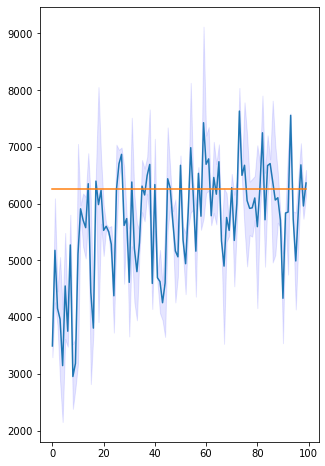

In [8]:
plt.figure(figsize=(5, 8))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

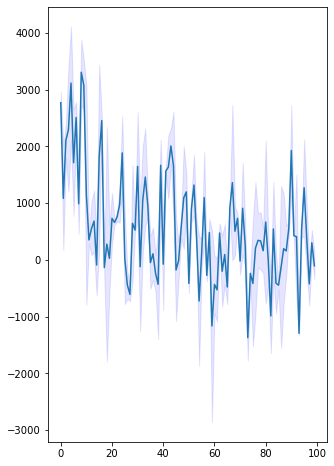

In [9]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)
ucb_stdev_regret = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.fill_between(range(len(ucb_mean_regret)), (ucb_mean_regret-ucb_stdev_regret), (ucb_mean_regret+ucb_stdev_regret), color='b', alpha=.1)
plt.show()

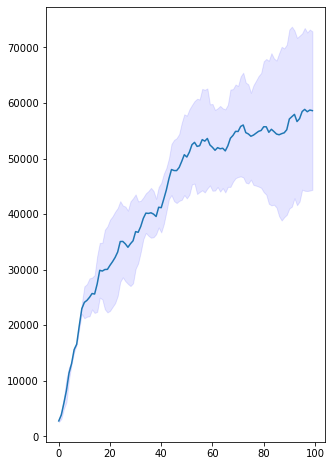

In [10]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)
ucb_cum_reg_stdev = np.std(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.fill_between(range(len(ucb_cum_reg_mean)), (ucb_cum_reg_mean-ucb_cum_reg_stdev), (ucb_cum_reg_mean+ucb_cum_reg_stdev), color='b', alpha=.1)

plt.show()

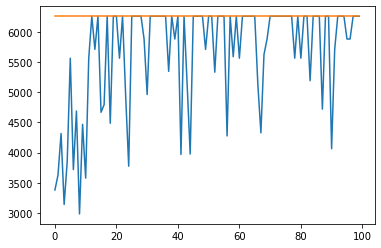

In [11]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [94]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
[2, 0, 1, 3, 2]
[3, 3, 2, 2, 1]
[0, 3, 0, 1, 0]
[2, 2, 1, 1, 2]
[1, 3, 1, 0, 3]
[2, 1, 2, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 3, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
loading: [=                             ] 3.3%
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 1]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===                           ] 10.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 1]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1,

(1, 300)

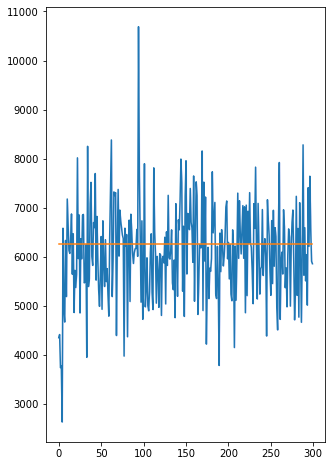

In [95]:
plt.figure(figsize=(5, 8))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

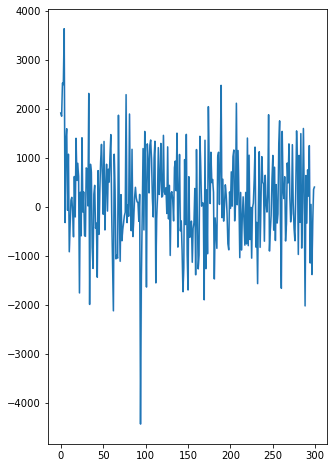

In [96]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)
ts_reg_stdev = np.std(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.fill_between(range(len(ts_mean_regret)), (ts_mean_regret-ts_reg_stdev), (ts_mean_regret+ts_reg_stdev), color='b', alpha=.1)
plt.show()

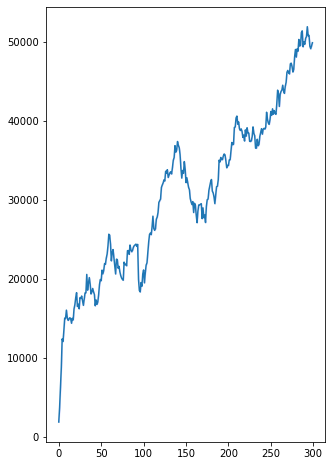

In [97]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)
ts_cum_reg_stdev = np.std(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.show()

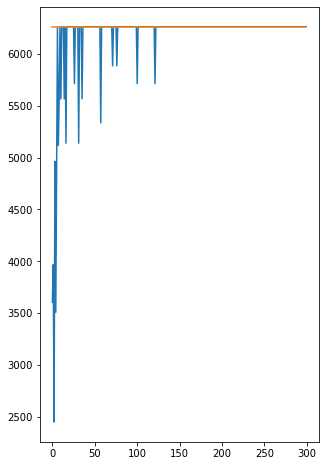

In [98]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.figure(figsize=(5,8))
plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [103]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2]) / today_customer
seen = np.array(ts_learner.history_interactions)
theoretical_regret = 1024 * np.log(seen)/delta_arms
print(seen)

[1.76000000e+02 3.24000000e+02 6.86000000e+02 1.35800000e+03
 2.70700000e+03 5.42300000e+03 1.08500000e+04 2.17130000e+04
 4.34250000e+04 8.68550000e+04 1.73714000e+05 3.47451000e+05
 6.94861000e+05 1.38973600e+06 2.77946700e+06 5.55893400e+06
 1.11178650e+07 2.22357340e+07 4.44714570e+07 8.89429120e+07
 1.77885834e+08 3.55771659e+08 7.11543344e+08 1.42308667e+09
 2.84617335e+09 5.69234669e+09 1.13846934e+10 2.27693868e+10
 4.55387736e+10 9.10775471e+10 1.82155094e+11 3.64310188e+11
 7.28620377e+11 1.45724075e+12 2.91448151e+12 5.82896302e+12
 1.16579260e+13 2.33158521e+13 4.66317041e+13 9.32634082e+13
 1.86526816e+14 3.73053633e+14 7.46107266e+14 1.49221453e+15
 2.98442906e+15 5.96885813e+15 1.19377163e+16 2.38754325e+16
 4.77508650e+16 9.55017300e+16 1.91003460e+17 3.82006920e+17
 7.64013840e+17 1.52802768e+18 3.05605536e+18 6.11211072e+18
 1.22242214e+19 2.44484429e+19 4.88968858e+19 9.77937716e+19
 1.95587543e+20 3.91175086e+20 7.82350173e+20 1.56470035e+21
 3.12940069e+21 6.258801

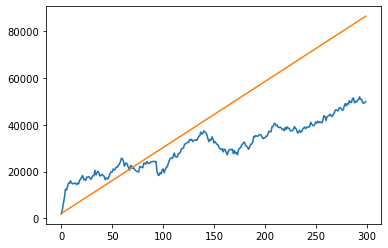

In [100]:
plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()